# Configuration -1 
This is when only one dataset is tested 
Here is where we check thresholds of different frequency



In [1]:
%load_ext autoreload

In [1]:
%run C:/Users/z004csar/Thesis_Project/MasterThesis_2022_CombustionFlameComparison/Master_thesis_Final_script.py
%load_ext autoreload
%run Pyscripts/MT_SE_PT_Preprocess.py
%run  Pyscripts/MT_SE_PT_Stacked_Ind_DF_Model.py
# %run  Pyscripts/MT_SE_PT_Stacked_Ind_DF_Visualisation.py
# %run  Pyscripts/Combinedf/MT_SE_PT_CombineDF_Model.py

In [2]:
##Different Data for testing 
Datalist  = ['C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\Gazli-2_750_20210618_UnbalancedDataset.xlsx',
             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\Gazli-1_750_20210629_flamedetector_data(T6 and T7).xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\Gazli-2_750_20210629_Provskott1_3.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\Gazli-2_750_20210629_Provskott1_2.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\Gazli-2_750_20210629_Provskott1_1.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\Gazli-2_750_20210701_Provskott3_3.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\Gazli-2_750_20210701_Provskott3_2.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\Gazli-2_750_20210701_Provskott3_1.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Gazli-2_20210629_Provskott-1_MoreVariables.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, CastbergSpare_2021112_Provskott-2.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Chimei-1_20210906_Kundprov.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Chimei-1_20210903_Provskott-2.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Chimei-1_20210902_Provskott-1.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Gazli-2_20210705_Kundprov.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Gazli-2_20210701_Provskott-3.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Gazli-2_20210630_Provskott-2.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Gazli-2_20210629_Provskott-1.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Gazli-1_20210618_Kundprov.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Gazli-1_20210617_Provskott.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Pipestone_20200605_Förbränningsverifering.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Pipestone_20200601_Startprover.xlsx',
#             'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Pipestone_20200528_Kundprov.xlsx',        
            'C:\\Users\\z004csar\\Thesis_Project\\Data\\SGT-750_Data\\Data to train\\SGT-750, Pipestone_20200529_Provskott.xlsx'
                ]

### Create datadictionary

In [3]:
Datadic = {}
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    for i in range(len(Datalist)):
        Datadic[i] = pd.read_excel(Datalist[i],engine="openpyxl",index_col=0)

In [5]:
####For Single Turbine Training take Datadic[1]
####For Single Turbine Testing take Datadic[0]
##Combined Burners
# %run Pyscripts/Combinedf/MT_SE_PT_CombineDF_preprocess.py

In [6]:
%%time
##Training Data
dataPT = preprocess_Indiv_burner_T_P_sans_SULP(Datadic[1])
dataStacked = preprocess_combineburner_T_P_sans_SP(Datadic[1],rm = False)

## Testing Data

dataPT_Test = preprocess_Indiv_burner_T_P_sans_SULP(Datadic[0])
dataStacked_Test = preprocess_combineburner_T_P_sans_SP(Datadic[0],rm = False)
dataStacked_Test2 = preprocess_combineburner_T_P_sans_SP(Datadic[0])

No na values
No na values
No na values
Wall time: 641 ms


#### Custom metric for scoring 

Import FNRFPR  <br>
create make_score 


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
X_train, X_test, y_train, y_test = train_test_split(dataStacked.iloc[:,1:], dataStacked.iloc[:,0].astype('category'), test_size=0.20, random_state=42,shuffle = False)
X_test1  = dataStacked_Test.iloc[:,1:]
y_test1 = dataStacked_Test.iloc[:,0]

In [12]:
from sklearn.model_selection import train_test_split
X_trainS, X_testS, y_trainS, y_testS = train_test_split(dataStacked.iloc[:,1:], dataStacked.iloc[:,0].astype('category'), test_size=0.20, random_state=42,shuffle = True)
X_test2  = dataStacked_Test.iloc[:,1:]
y_test2 = dataStacked_Test.iloc[:,0]

In [13]:
fnr_score = make_scorer(FNRFPR,greater_is_better =False,
                       needs_proba = False)

### Import all the libraries

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import xgboost as xgb

### Use the metrics determined after hyperparameter optimization

In [16]:
log_model = LogisticRegression(C= .1,solver= 'liblinear',max_iter = 350,penalty = 'l2',random_state = 21)
svclf = svm.SVC(kernel = 'rbf',probability = True,gamma = .001,C = 1)
xgbmodel = xgb.XGBClassifier(n_estimators =1000,criterion = 'entropy',eta =0.01,max_depth = 6,subsample = .7,score = 'f1')
neigh = KNeighborsClassifier(n_neighbors=1,weights = 'uniform',p = 2 )
rfclf = RandomForestClassifier(n_estimators =150,criterion = 'entropy',min_samples_leaf = 2,max_features ='auto')
gnb = GaussianNB(var_smoothing = 0.00005336699231206307)
# model = KNeighborsClassifier(3,metric = 'Euc')
# from yellowbrick.classifier.threshold import discrimination_threshold
# discrimination_threshold(model, X_train, y_train)

In [55]:
# Instantiate the classification model and visualizer

# visualizer = DiscriminationThreshold(model)
# visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
# visualizer.show()           # Finalize and render the figure


### Fit the models

In [108]:
log_modeltrained = log_model.fit(X_train,y_train)
gnb_modeltrained =gnb.fit(X_train,y_train)
# svm_model_training = svclf.fit(X_train,y_train)
# xgb_model_training  = xgbmodel.fit(np.array(X_trainS),y_trainS)
# rfclf_training  = rfclf.fit(X_trainS,y_trainS)

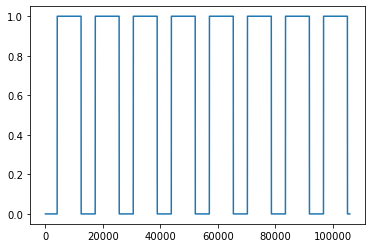

In [43]:
plt.plot(y_test1)

### Threshold testing to see which threshold holds best for each of the algorithm

In [109]:
threshold = {}
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    for i in np.arange(.1,1,.1):
        threshold[i] = ModelthresholdTesting(log_modeltrained,X_test1.values,y_test1.astype('category'),threshold = i)
    

In [110]:
threshold

{0.1: (0.0022156339301472186, 7, 137, 0.9986388893617375),
 0.2: (0.0019241286917683715, 8, 116, 0.998828000365684),
 0.30000000000000004: (0.0017443164803211044, 8, 104, 0.9989414530702253),
 0.4: (0.0016553643047628034, 10, 95, 0.9990076409161754),
 0.5: (0.0015743058044008437, 13, 85, 0.9990738297727974),
 0.6: (0.0015911242358296717, 17, 80, 0.9990833021125255),
 0.7000000000000001: (0.0015478343095270569, 21, 71, 0.9991305841771939),
 0.8: (0.0023971642132710105, 62, 65, 0.9987999754967429),
 0.9: (0.011715790830947394, 483, 51, 0.994959846320728)}

In [111]:
threshold = {}
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    for i in np.arange(.1,1,.1):
        threshold[i] = ModelthresholdTesting(gnb_modeltrained,X_test.values,y_test.astype('category'),threshold = i)
    

In [112]:
threshold

{0.1: (0.013533610559856362, 9, 136, 0.9953497001136519),
 0.2: (0.013247343156062581, 9, 133, 0.9954457471323799),
 0.30000000000000004: (0.012960909704580048, 9, 130, 0.9955418010510442),
 0.4: (0.012960909704580048, 9, 130, 0.9955418010510442),
 0.5: (0.012674310060830717, 9, 127, 0.995637861877225),
 0.6: (0.012483151231154838, 9, 125, 0.9957019062692664),
 0.7000000000000001: (0.01219627427855359, 9, 122, 0.9957979786248293),
 0.8: (0.01210061161737991, 9, 121, 0.9958300042824747),
 0.9: (0.011717775777791645, 9, 117, 0.9959581146161768)}

In [62]:
threshold = {}
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    for i in np.arange(.1,1,.1):
        threshold[i] = ModelthresholdTesting(gnb_modeltrained,X_test.values,y_test.astype('category'),threshold = i)
    

In [63]:
threshold

{0.1: (0.01226252037228545, 9, 136, 0.9953497001136519),
 0.2: (0.012004867836030692, 9, 133, 0.9954457471323799),
 0.30000000000000004: (0.011747065860282402, 9, 130, 0.9955418010510442),
 0.4: (0.011747065860282402, 9, 130, 0.9955418010510442),
 0.5: (0.011489114314918848, 9, 127, 0.995637861877225),
 0.6: (0.011317063459453087, 9, 125, 0.9957019062692664),
 0.7000000000000001: (0.011058862341827612, 9, 122, 0.9957979786248293),
 0.8: (0.010972761994103457, 9, 121, 0.9958300042824747),
 0.9: (0.010628193931602558, 9, 117, 0.9959581146161768)}

In [64]:
threshold = {}
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    for i in np.arange(.1,1,.1):
        threshold[i] = ModelthresholdTesting(xgb_model_training,X_test.values,y_test.astype('category'),threshold = i)
    

In [65]:
threshold

{0.1: (0.0017661279319281158, 2, 19, 0.9993255960426466),
 0.2: (0.0015905780600824866, 2, 17, 0.9993898097826931),
 0.30000000000000004: (0.0012392724289196112, 2, 13, 0.9995182468508926),
 0.4: (0.0010235298054890648, 3, 10, 0.9995824597581618),
 0.5: (0.0007195683843541855, 4, 6, 0.9996787951329925),
 0.6: (0.0006392086014414314, 6, 4, 0.9996787790633775),
 0.7000000000000001: (0.0007424032644094713, 10, 3, 0.9995823866414003),
 0.8: (0.000852754589593507, 16, 1, 0.999453835444106),
 0.9: (0.0018069884348696017, 36, 1, 0.9988109898554037)}

In [66]:
threshold = {}
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    for i in np.arange(.1,1,.1):
        threshold[i] = ModelthresholdTesting(rfclf_training,X_test.values,y_test.astype('category'),threshold = i)
    

In [67]:
threshold

{0.1: (0.0023714257831560456, 0, 27, 0.9991330171024868),
 0.2: (0.0018455228981544773, 0, 21, 0.999325629636976),
 0.30000000000000004: (0.0013190034196384954, 0, 15, 0.9995182708810734),
 0.4: (0.0008797653958944282, 0, 10, 0.99967882722652),
 0.5: (0.00039997341413786167, 1, 4, 0.9998393995740077),
 0.6: (0.0004956811877056995, 3, 4, 0.9997751537819123),
 0.7000000000000001: (0.0005108674751624787, 7, 2, 0.9997108903010474),
 0.8: (0.0007167773689492043, 15, 0, 0.9995180900977405),
 0.9: (0.0020043905698196047, 42, 0, 0.9986501936168943)}

In [44]:
threshold = {}
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    for i in np.arange(.1,1,.1):
        threshold[i] = ModelthresholdTesting(rfclf_training,X_test.values,y_test.astype('category'),threshold = i)
    

In [45]:
threshold

{0.1: (0.0022838180753464764, 0, 26, 0.9991651172004566),
 0.2: (0.0018455228981544773, 0, 21, 0.999325629636976),
 0.30000000000000004: (0.0014067995310668231, 0, 16, 0.9994861620107226),
 0.4: (0.0007918662625867631, 0, 9, 0.9997109408963443),
 0.5: (0.0005759482294567291, 1, 6, 0.9997751650226432),
 0.6: (0.00040764616838130375, 3, 3, 0.999807272260054),
 0.7000000000000001: (0.0005108674751624787, 7, 2, 0.9997108903010474),
 0.8: (0.0007645259938837921, 16, 0, 0.9994859563194373),
 0.9: (0.0019091256204658267, 40, 0, 0.9987145025636369)}

In [46]:
threshold = {}
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    for i in np.arange(.1,1,.1):
        threshold[i] = ModelthresholdTesting(rfclf_training,X_test1.values,y_test1.astype('category'),threshold = i)
    

In [47]:
threshold

{0.1: (0.005778275475923853, 0, 430, 0.9959323204073938),
 0.2: (0.0020779921737957095, 0, 154, 0.9985442756746613),
 0.30000000000000004: (0.00047311504956443375, 0, 35, 0.9996692569569289),
 0.4: (0.00044609330409444564, 0, 33, 0.9996881581895596),
 0.5: (0.00040555764175741643, 0, 30, 0.9997165096675477),
 0.6: (0.00039204494247003336, 0, 29, 0.999725960061313),
 0.7000000000000001: (0.00040400874080725964, 1, 28, 0.9997259614931671),
 0.8: (0.0004653488578639228, 5, 25, 0.9997165170718321),
 0.9: (0.0009695444439178967, 28, 19, 0.9995559103311298)}

In [587]:
%run C:/Users/z004csar/Thesis_Project/MasterThesis_2022_CombustionFlameComparison/Master_thesis_Final_script.py
%load_ext autoreload
%run Pyscripts/Oldscripts/MT_SE_PT_Preprocess.py
%run  Pyscripts/MT_SE_PT_Stacked_Ind_DF_Model.py
# %run  Pyscripts/MT_SE_PT_Stacked_Ind_DF_Visualisation.py

# %run  Pyscripts/Combinedf/MT_SE_PT_CombineDF_Model.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Test with tuned threshold limits

In [581]:
neigh = KNeighborsClassifier(n_neighbors=3,weights = 'uniform',p = 2)

FN : 18 
FP : 78
Total number of negatives are 96
FN : 18 
FP : 77
Total number of negatives are 95


C:\Users\z004csar\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\z004csar\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\z004csar\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\z004csar\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\z004csar\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\z004csar\Anaconda3\lib\site-packages\sklearn

FN : 17 
FP : 76
Total number of negatives are 93
FN : 17 
FP : 76
Total number of negatives are 93
FN : 17 
FP : 76
Total number of negatives are 93


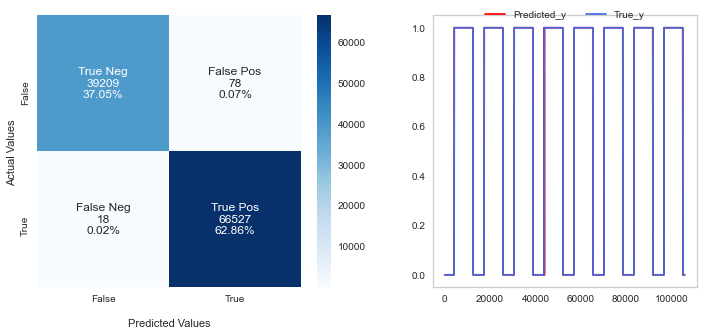

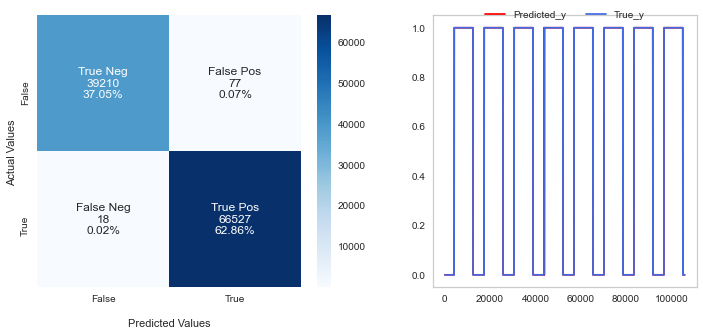

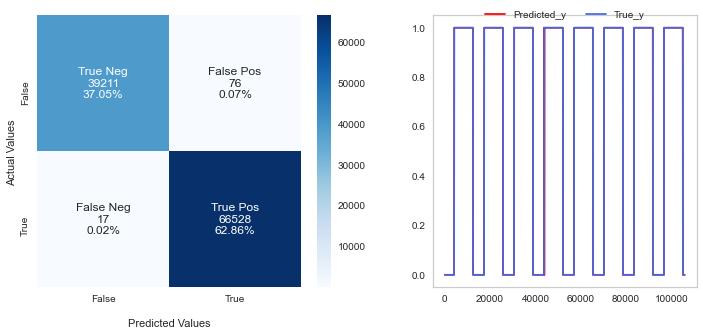

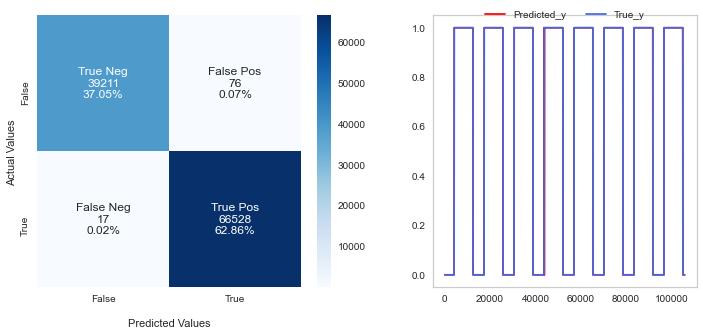

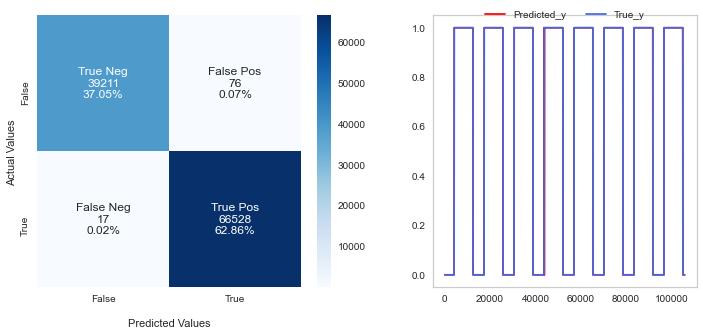

In [615]:
for i in [.01,.1,1,5,10]:
    log_model = LogisticRegression(C= i,solver= 'newton-cg',max_iter = 350,penalty = 'l2',random_state = 21)
    log_modeltrained = log_model.fit(X_train,y_train)
    CFandYplot(X_train,y_train,X_test1,y_test1,log_modeltrained,threshold = 0.7)

FN : 17 
FP : 80
Total number of negatives are 97


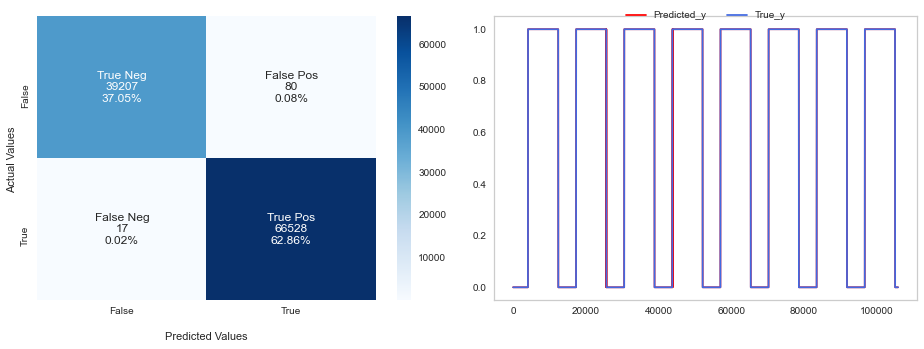

In [612]:
CFandYplot(X_train,y_train,X_test1,y_test1,log_modeltrained,threshold = 0.6)
plt.tight_layout()
plt.savefig('RFPlot')

In [584]:
fnrfpr,mcc,fscore,sum(fnrfpr.values()),sum(mcc.values()),sum(fscore.values())

({0: 0.0005439136515348576,
  1: 0.0005439136515348576,
  2: 0.0004237213438425498,
  3: 0.0005439136515348576,
  4: 0.0005439136515348576,
  5: 0.0003605335897127749,
  6: 0.0005439136515348576,
  7: 0.0005439136515348576},
 {0: 0.9993523069418652,
  1: 0.9993523069418652,
  2: 0.9995141837178448,
  3: 0.9993523069418652,
  4: 0.9993523069418652,
  5: 0.9995142885929873,
  6: 0.9993523069418652,
  7: 0.9993523069418652},
 {0: 0.9996976213683223,
  1: 0.9996976213683223,
  2: 0.9997732207562627,
  3: 0.9996976213683223,
  4: 0.9996976213683223,
  5: 0.9997732112898785,
  6: 0.9996976213683223,
  7: 0.9996976213683223},
 0.00404773684276447,
 7.995142313962022,
 7.997732160256075)

The total Number of False positives in the list is 7
The total Number of False negatives in the list is 23


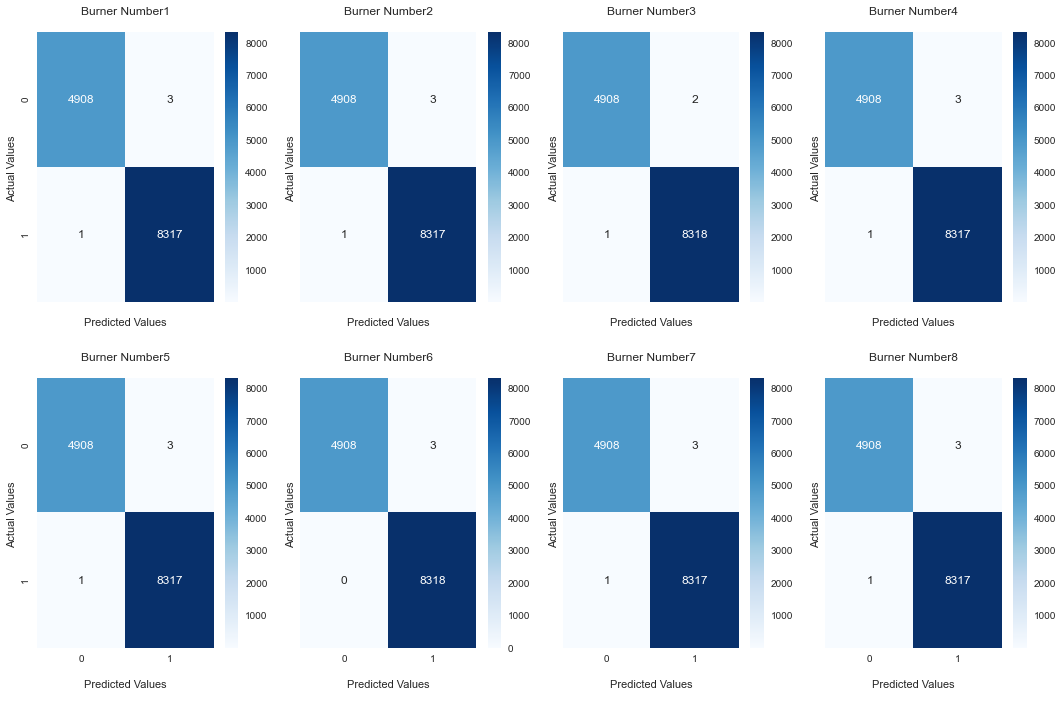

In [588]:
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    model = plotconfusiongrid_bluematrix(dataPT_Test,neigh,0.5)
    plt.tight_layout()
    plt.savefig('KNN8burnerConfusionMatrix')

### Gridsearch for hyperparameter

In [18]:
from sklearn.pipeline import make_union,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
model = LogisticRegression()
pipe = make_pipeline(preprocessor, model)

param_grid = {'logisticregression__C': np.logspace(-2, 1, 10)}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='fnr_score',
                    n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(X_train, y_train)

print(grid.best_score_)
best_model = grid.best_estimator_

NameError: name 'preprocessor' is not defined

In [ ]:
plt.plot(dataStacked.iloc[:,0])
plt.title("Train Data")
plt.savefig('Traindata')

In [ ]:
plt.plot(dataStacked_Test.iloc[:,0])
plt.title("Test Data")
plt.savefig('Testdata')

## Index of when the prediction was taken and when the true value was detected

In [ ]:
# for i in range(len(dataStacked['BurnerStatus'].diff())):
#         if dataStacked['BurnerStatus'].diff()[i] == 1 or dataStacked['BurnerStatus'].diff()[i] == -1:
#             print('true')
#         else:
#             print('False')

## Correlation chart

In [ ]:
heatmap_burner_temperature(dataT,method = 'kendall')
plt.tight_layout()
plt.savefig('Heatmap_Temperature')

In [ ]:
heatmap_burner_pressure(dataP,method = 'kendall')
plt.tight_layout()
plt.savefig('Heatmap_Pressure')

## Logistic Regression 

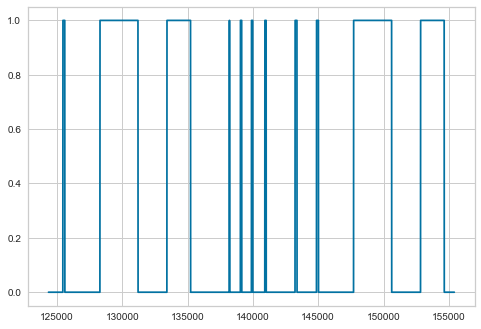

In [52]:
plt.plot(y_test)

In [126]:
%%time
# from sklearn.linear_model import LogisticRegression
# log_m = LogisticRegression(max_iter = 300,C=.01,solver = 'liblinear',penalty = 'l2')
# log_model = LogisticRegression()
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='average_precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train.astype('category'))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999484 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999412 (0.000230) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999355 (0.000248) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.999402 (0.000237) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.999412 (0.000230) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999372 (0.000263) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.999400 (0.000238) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.999413 (0.000230) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999378 (0.000245) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.999386 (0.000243) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.999418 (0.000227) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.999390 (0.000238) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.999304 (0.000271) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.999484 (0.000198) wi

In [124]:
%%time
# from sklearn.linear_model import LogisticRegression
# log_m = LogisticRegression(max_iter = 300,C=.01,solver = 'liblinear',penalty = 'l2')
# log_model = LogisticRegression()
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=cv, scoring=fnr_score,error_score=0)
grid_result = grid_search.fit(X_trainS, y_trainS.astype('category'))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.004552 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
-0.004624 (0.001014) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
-0.004552 (0.001076) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
-0.004643 (0.001022) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
-0.008396 (0.001493) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
-0.004624 (0.001014) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
-0.004604 (0.001140) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
-0.004643 (0.001021) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
-0.008391 (0.001516) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
-0.004614 (0.001009) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
-0.004651 (0.001096) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
-0.004701 (0.001090) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
-0.008377 (0.001502) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
-0.004710 (0.001093) with: {'

C:\Users\z004csar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
log_fit = log_m.fit(X_train,y_train.astype('category'))
log_predicted = log_fit.predict(X_test1)
confusion_matrix(y_test1.astype('category'),log_predicted)

array([[39208,    72],
       [   30, 66514]], dtype=int64)

In [83]:
log_fit = log_m.fit(X_train,y_train.astype('category'))
log_predicted = log_fit.predict(X_test1)
confusion_matrix(y_test1.astype('category'),log_predicted)

array([[39193,    87],
       [   17, 66527]], dtype=int64)

## Ridge Classifier


In [ ]:
from sklearn.linear_model import RidgeClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
#,multi_class = 'multinomial', max_iter = 1000)

# turbine_model_eval(X,y,log_model)
# for i in np.arange(0,1,.1):
#     log_model = LogisticRegression(solver='saga', random_state=21,penalty = 'elasticnet',max_iter=250,l1_ratio=i)#,multi_class = 'multinomial', max_iter = 1000)
    
#     print(Model_testing_newdata(dataStacked,dataStacked_Test,log_model,S = True,MS = 'Minmax'))

In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(dataStacked.iloc[:,1:], dataStacked.iloc[:,0],
                                                    test_size=0.10, random_state=42,shuffle = False)
# X_train1 = np.array(X_train1)
y_train1 = y_train1.astype('category')
# X_test1 = np.array(X_test1)
y_test1 = y_test1.astype('category')

In [ ]:
y_scores = Model_testing_newdata_predict_proba(X_train1,X_test1, y_train1, y_test1,log_m)
# y_scores_knn = Model_testing_newdata_predict_proba(X_train1,X_test1, y_train1, y_test1,neigh)
# y_scores_svm_rbf = Model_testing_newdata_predict_proba(X_train1,X_test1, y_train1, y_test1,svclf)
# y_scores_nb =  Model_testing_newdata_predict_proba(X_train1,X_test1, y_train1, y_test1,gnb)
y_scores_svm = Model_testing_newdata_predict_proba(X_train1,X_test1, y_train1, y_test1,svclf1)
y_scores_rf  = Model_testing_newdata_predict_proba(X_train1,X_test1, y_train1, y_test1,rfclf)
y_scores_XGB = Model_testing_newdata_predict_probaXGB(X_train1,X_test1, y_train1, y_test1,xgbmodel)

In [ ]:
y_scores1 = y_scores[:,1]
y_scores_knn1 = y_scores_knn[:,1]
y_scores_svm_rbf1 = y_scores_svm_rbf[:,1]
y_scores_svm1 = y_scores_svm[:,1]
y_scores_rf1 = y_scores_rf[:,1]
y_scores_XGB1 = y_scores_XGB[:,1] 
y_scores_gnb  = y_scores_nb[:,1] 

In [ ]:
y_list = [y_scores1,y_scores_knn1,y_scores_svm_rbf1,y_scores_svm1,y_scores_rf1,y_scores_XGB1,y_scores_gnb]

In [ ]:

y_pred_new_threshold = (logm.predict_proba(dataStacked_Test)[:,1]>=0.5).astype(int)

In [ ]:
log_m.fit(np.asarray(X_train),y_train.astype('category'))
y_pred = log_m.predict(np.asarray(X_test))
cf_matrix = confusion_matrix(y_test.astype('category'), y_pred)
tn,fp,fn,tp = cf_matrix.ravel()

In [ ]:
y_pred_new_threshold = (logm.predict_proba(dataStacked_Test)[:,1]>=0.5).astype(int)

In [ ]:
from sklearn.svm import SVC

svclf = SVC(kernel= 'rbf',probability = True)

In [ ]:
for i in np.arange(.1,1,.1):
    
    CFandYplot(X_train1,y_train1,X_test1,y_test1,svclf,i)

In [ ]:
log_m.predict(X_test1)
CFPlot(log_m.predict(X_test1),y_test1)

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
def CFPlot(y_pred,y_test):
    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators =150,criterion = 'entropy',min_samples_leaf = 2,max_features ='auto')

In [360]:
from xgboost import XGBClassifier

# fit model no training data
xgbmodel = XGBClassifier(n_estimators =1000,criterion = 'entropy',eta =0.01,max_depth = 6,subsample = .7,max_child_weight = 6,score = 'f1')

In [ ]:
CFandYplot(X_train,y_train,X_test,y_test,svclf,.15)
plt.savefig('newsvm.png')
plt.show()

In [ ]:
dataPT[0]

In [ ]:
svclf.fit(np.array(X_train),y_train.astype('category'))
plotconfusiongrid(dataPT_Test,svclf,0.15)
plt.savefig('svcballburner')

In [ ]:
for i in np.arange(.1,1,.1):
    CFandYplot(X_train1,y_train1,X_test,y_test,xgbmodel,threshold = i)


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

In [ ]:
y_list

In [ ]:
pcatcher = {}
rcatcher = {}
threscather = {}
fscore = {}
ix = {}
for i,j in enumerate(y_list):
    
    pcatcher[i], rcatcher[i], threscather[i] = precision_recall_curve(y_test1, j)
    # convert to f score
    fscore[i] = (2 * pcatcher[i] *rcatcher[i]) / (pcatcher[i] + rcatcher[i])
    # locate the index of the largest f score
    ix[i] = np.argmax(fscore[i])
    print('Best Threshold=%f, F-Score=%.3f' % (threscather[i][ix[i]], fscore[i][ix[i]]))
    no_skill = len(y_test1[y_test1==1]) / len(y_test1)
    plt.plot([0, 1], [no_skill, no_skill])
    plt.plot(rcatcher[i], pcatcher[i], marker='.', label=i)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
plt.show()
# plt.plot(precision_recall_curve(y_test1, y_scores1))

In [ ]:
    no_skill = len(y_test1[y_test1==1]) / len(y_test1)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='Logistic')
    
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    show the plot
    plt.show()

In [ ]:
for i,j in enumerate(y_list):
    print(i)

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test1, y_scores1)
no_skill = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]

In [ ]:

threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(X_train1, y_train1)
y_pred = lrt.predict(X_train, threshold)

In [ ]:
threshold, optimal_tpr_minus_fpr

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test1, y_scores)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_scores = pd.DataFrame(Model_testing_newdata_predict_proba(X_train1,X_test1, y_train1, y_test1,log_m))
threshold_list = [0.05,0.1,0.15,0.2,0.21,0.22,0.23,0.24,0.25,0.3,0.35,0.4,0.45,0.5,0.55]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = y_scores.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test1.to_numpy().reshape(y_test1.to_numpy().size,1),
                                           Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test1.to_numpy().reshape(y_test1.to_numpy().size,1),
                           Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1)))

In [ ]:
LogisticRegressionWithThreshold.threshold_from_optimal_tpr_minus_fpr()

In [ ]:
fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(y_scores)
axs[0, 0].set_title("Logistic")
axs[1, 0].plot(y_scores_svm_rbf)
axs[1, 0].set_title("SVM")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(y_scores_rf+1)
axs[0, 1].set_title("RandomForest")
axs[1, 1].plot(y_scores_XGB)
axs[1, 1].set_title("XGBoost")
axs[2, 0].plot(y_scores_svm_rbf)
axs[2, 0].set_title("SVM_rbf")
axs[2, 1].plot(y_scores_knn)
axs[2, 1].set_title("KNN")
fig.tight_layout()
plt.savefig('Probability_prediction')

In [ ]:
%run  Pyscripts/MT_SE_PT_Stacked_Ind_DF_Model.py

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
plt.plot(y_scores[:,0])
plt.plot(y_scores_rf[:,0])
plt.plot(y_scores_svm[:,0])
plt.plot(y_scores_svm_rbf[:,0])
plt.plot(y_scores_XGB[:,0])


In [ ]:
from sklearn.metrics import precision_recall_curve
fpr, tpr, thresholds = precision_recall_curve(y_test, y_scores[:,1])

In [ ]:
from sklearn.metrics import precision_recall_curve
fpr, tpr, thresholds = precision_recall_curve(y_test, y_scores_rf[:,1])

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_auc = roc_auc_score(y_test, y_scores[:,1])
lr_auc

In [ ]:
from numpy import sqrt
from numpy import argmax
gmeans = sqrt(tpr*(1-fpr))
plt.plot(gmeans)

In [ ]:
ix = argmax(gmeans)
thresholds[ix]

In [ ]:
# plt.plot(tpr)
plt.plot(fpr,tpr)
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')

In [ ]:
def default_cost_function(tn, fp, fn, tp):
    cost = 0
    cost += (tn * 1000) 
    cost += (fp * 1000) 
    cost += (fn * 1500) 
    cost += (tp * -20000) 
    
    return cost

In [ ]:
log_model.fit(X_train, y_train.astype('category'))

In [ ]:
metrics.plot_roc_curve(log_model, X_test, y_test)

In [ ]:
log_coef_allburners(dataStacked,log_model)

In [ ]:
log_coef_allburners(dataStacked_Test,log_model)[0][0]

In [ ]:
modeltest = Model_testing_newdata_predict_proba(dataStacked,dataStacked_Test,log_model)

In [ ]:
plt.plot(modeltest [modeltest<.5])

In [ ]:
plt.plot(modeltest [modeltest>.5])

In [ ]:
plt.plot(Model_testing_newdata_predict_proba(dataStacked,dataStacked_Test,log_model))

In [ ]:
%%time
##Scaled 
Model_testing_newdata(dataStacked,dataStacked_Test,log_model,S = True, MS = 'Minmax')

In [ ]:
def confumatrixCDF(data1,data2,model,S = False,MS = 'Standard'):
    ##Confusion Matrix
    X_train = np.array(data1.iloc[:,1:])
    y_train = data1.iloc[:,0].astype('category')
    X_test = np.array(data2.iloc[:,1:])
    y_test = data2.iloc[:,0].astype('category')
    if S == True:
        if MS == 'Standard':
            model.fit(stdscaler.fit_transform(X_train),y_train)
            cm = confusion_matrix(y_test, model.predict(stdscaler.fit_transform(X_test)))
        elif MS == 'Minmax':
            model.fit(scalermin.fit_transform(X_train),y_train)
            cm = confusion_matrix(y_test, model.predict(scalermin.fit_transform(X_test)))
    else:
        model.fit(X_train,y_train)
        # print(f"The score using {model}  after training on Data1 and tesy_trainting on Data2 is",
        # model.score(data2.iloc[:,1:],data2.iloc[:,0].astype('category'))*100)
        cm = confusion_matrix(y_test, model.predict(X_test))
    tn, fp, fn, tp = cm.ravel()
    # ax= plt.subplots(1,2,1)
    fig, ax = plt.subplots(1, 2,figsize=(13,5))
    fig.tight_layout()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    # labels, title and ticks
    ax[0].set_xlabel('Predicted labels')
    ax[0].set_ylabel('True labels');
    ax[0].set_title('Confusion Matrix');
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    # plt.subplot(1, 2, 2)
    ploty(ax[1],X_test,y_test,model,S,MS)
    plt.tight_layout()
#     plt.show()
    plt.savefig('Logistic_CF')
    print("FN :",fn,"\nFP :",fp,"\nTN :",tn,"\nTP :",tp)
    MCC = (tp*tn - fp*fn) / math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    return(tn, fp, fn, tp,MCC)
# plt.savefig('CF1')

In [ ]:
dataStacked_Test

In [ ]:
# plotconfusiongrid(dataStacked_Test,log_model)

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "LGM": confumatrixCDF(dataStacked,dataStacked_Test,log_model),
}
# ConfusionmatrixTrainLowTestHigh = {
#     "LGM": confumatrixCDF(dataStacked_Test,dataStacked,log_model),
# }

ConfusionmatrixTrainHighTestLow['LGM']
plt.savefig('CF1')

Train confusion matrix with elastic net penalty with minmax scaling incresing the number of iterations to 350

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "LGM_Minmax": confumatrixCDF(dataStacked,dataStacked_Test,log_model,S = True,MS = 'Minmax')
}

## NaiveBayes

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
gnb = GaussianNB(var_smoothing = .0005)
bnb = BernoulliNB()
cnb = ComplementNB()
mnb = MultinomialNB()
from sklearn.preprocessing import PowerTransformer

In [ ]:
gnb_predictprob = Model_testing_newdata_predict_proba(dataStacked,dataStacked_Test,gnb)

In [ ]:
plt.plot(gnb_predictprob[:,0])

In [ ]:
nb_classifier = GaussianNB()
# from sklearn.model_selection import cross_val_score,StratifiedKFold
# stratifiedkf=StratifiedKFold(n_splits=5)
# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
# gs_NB = GridSearchCV(estimator=nb_classifier, 
#                  param_grid=params_NB, 
#                  cv=stratifiedkf,   # use any cross validation technique 
#                  verbose=1, 
#                  scoring='f1_weighted') 
# gs_NB.fit(X_train, y_train.astype('category'))
nb_classifier.fit()
gs_NB.best_params_

In [ ]:
np.logspace(0,-9, num=100)

In [ ]:
%run  Pyscripts/MT_SE_PT_Stacked_Ind_DF_Model.py

In [ ]:
max(b.values())

In [ ]:
np.logspace(.1,-9,num = 100)

In [ ]:
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
gnb = GaussianNB()
# from sklearn.model_selection import 
var_smooth = np.logspace(.1,-9,num = 100)
# define grid search
grid = dict(var_smoothing = var_smooth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=gnb, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
#logistic
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
# from sklearn.model_selection import 
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
##knn
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 15, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
model = SVC()
kernel = ['rbf']
C = [.001,.01,.1,1,10]
gamma = [.001,.01,.1,1,10]
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_resultRF = grid_search.fit(X_train, y_train.astype('category'))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_resultRF.cv_results_['mean_test_score']
stds = grid_resultRF.cv_results_['std_test_score']
params = grid_resultRF.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
##rf
%time 
n_estimators = [50,100,200,300,500,700]
max_features = ['sqrt', 'log2',0.2]
min_samples_leaf = [1,2,4]
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf = min_samples_leaf)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rfclf, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_resultRF = grid_search.fit(X_train, y_train.astype('category'))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_resultRF.cv_results_['mean_test_score']
stds = grid_resultRF.cv_results_['std_test_score']
params = grid_resultRF.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
%%time
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
min_child_weight = [0,2,4,6,9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth,min_child_weight = min_child_weight)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_resultXGB = grid_search.fit(np.array(X_train), y_train.astype('category'))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_resultXGB.cv_results_['mean_test_score']
stds = grid_resultXGB.cv_results_['std_test_score']
params = grid_resultXGB.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
%%time
gnb = GaussianNB(var_smoothing = 0.00005336699231206307)
Model_testing_newdata(dataStacked,dataStacked_Test,gnb)

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "NB1": confumatrixCDF(dataStacked,dataStacked_Test,gnb),
}
# ConfusionmatrixTrainLowTestHigh = {
#     "NB2": confumatrixCDF(dataStacked_Test,dataStacked,gnb),
# }
ConfusionmatrixTrainHighTestLow['NB1']
plt.savefig('CF_NB')



Naive Bayes cannot be used as it gives a very High number of False Positives.
This could be because of the reason that Naive Bayes works well on Multi=Classification and less on binary classification.

 When classifying a given data point, the Naive Bayes classifier first calculates the probabilities with which it believes the data points belong to each possible class label. It produces a classification by selecting the class label associated with the largest probability. Very often the largest probability is desirably associated with the correct class label. However, beyond the (important) close correlation between the largest probability and the correct class label, the probabilities are not correlated with classification confidence. The largest probability is frequently close to 1, with other probabilities close to 0. This indicates extremely high classification confidence, much more than empirically demonstrated actual classification accuracy justifies.

The reason: The Naive Bayes classifier’s conditional independence assumption, namely the assumption that features are independent of one another when conditioned upon class labels, is rarely accurate. Features often depend on one another non-trivial amounts, meaning multiple features often contain similar signals. However, the Naive Bayes classifier’s conditional independence assumption results in its treatment of features as distinct signals each of which should independently contribute additional confidence to the classifier’s prediction. This phenomenon amplifies the contribution of signals to the ultimate classification confidence. The Naive Bayes classifier nonetheless produces competitive classification accuracy because the extent to which the independence assumption favors different class labels roughly evens out on average.

The details: For more details (and mathematical rigor) about this topic, check out Domingos and Pazzani’s paper entitled ”On the Optimality of the Simple Bayesian classifier under Zero-One Loss”.

## PLS-DA

In [ ]:
from sklearn.cross_decomposition import PLSRegression

In [ ]:
pls_binary =PLSRegression(n_components=2)

In [ ]:
X_pls = pls_binary.fit_transform(dataStacked.iloc[:,1:],dataStacked.iloc[:,0] )[0]

In [ ]:
y_pred = pls_binary.predict(dataStacked_Test.iloc[:,1:])

In [ ]:
pred[pred>=.5]=1
pred[pred<.5]=0
##Convert to category
y_pred = pd.Categorical(y_pred)
y_pred
##True Labels
y_true = dataStacked_Test.iloc[:,0]

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_true.astype('category'),y_pred)
confusion_matrix(y_true.astype('category'),y_pred)

In [ ]:
plt.plot(pred,color = 'red')
plt.plot(dataStacked_Test.iloc[:,0],color = 'blue')
metrics.accuracy_score(y_true.astype('category'), y_pred)

## KNN 

In [ ]:
neigh.


In [ ]:
neigh.predict(X_test)

In [ ]:
neigh.fit(X_train,y_train.astype('float32'))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(p=1,weights = 'uniform',n_neighbors=3)
from sklearn.model_selection import cross_val_score,StratifiedKFold
# stratifiedkf=StratifiedKFold(n_splits=5)

# gs_NB = GridSearchCV(estimator=neigh, 
#                  param_grid=params_NB, 
#                  cv=stratifiedkf,   # use any cross validation technique 
#                  verbose=1, 
#                  scoring='f1_weighted') 
# gs_NB.fit(X_train, y_train.astype('category'))

# gs_NB.best_params_

In [ ]:
plt.plot(dfPred)

In [ ]:
%run C:\Users\z004csar\Thesis_Project\MasterThesis_2022_CombustionFlameComparison\Master_thesis_Final_script.py

In [ ]:
def position_ONOFF(yval): ##The y axis 
    offondic = {}
    onoffdic = {}
    for i,j in enumerate(np.diff(yval)):
        if (j==1):
            offondic[i] = j
        elif(j==-1):
            onoffdic[i] = j
    pos_ON = list()        
    for i in offondic.keys():
        pos_ON.append(i)
    pos_OFF = list()
    for i in onoffdic.keys():
        pos_OFF.append(i)
    return(pos_ON,pos_OFF)
    
def Timedifference(pred_y,true_y):
    Predvals = position_ONOFF(pred_y)
    Truevals = position_ONOFF(true_y)
    OfftoOndifference = []
    OntoOffdifference = []
    if len(Predvals[0])==len(Truevals[0]):
        OfftoOnlist = zip(Predvals[0], Truevals[0])
        OntoOfflist = zip(Predvals[1], Truevals[1])
        for list1_i, list2_i in OfftoOnlist:
            OfftoOndifference.append(list1_i-list2_i)    
        for list1_i, list2_i in OntoOfflist:
            OntoOffdifference.append(list1_i-list2_i)
        return(OfftoOndifference,OntoOffdifference)
    else:
        print('Inconsistensies in the classification')
        print(f'The number of Off to On inconsistensies are {len(Predvals[0])-len(Truevals[0])}')
        print(f'The number of On to Off inconsistensies are {len(Predvals[1])-len(Truevals[1])}')
        return(Predvals)

In [ ]:
import plotly.express as px
fig = px.line(y_test, title='Life expectancy in Canada')
for i in predlocations[1]:
    fig.add_trace(i)
fig.show()


In [ ]:

plt.plot(y_test)
# for i in predlocations[0]:
#     plt.axvline(x=i, color='b', label='axvline - full height')
for i in predlocations[1]:
    plt.axvline(x=i, color='r', label='a')

In [ ]:
predlocations[1]

In [ ]:
predlocations = Timedifference(dfPred,y_test)

In [ ]:
# %%time
# capture = []
# for i in range(1,6):
#     capture.append(Model_testing_newdata(dataStacked,dataStacked_Test,KNeighborsClassifier(n_neighbors=i)))

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "KNN": confumatrixCDF(dataStacked,dataStacked_Test,neigh),
}
# ConfusionmatrixTrainLowTestHigh = {
#     "KNN": confumatrixCDF(dataStacked_Test,dataStacked,neigh),
# }
ConfusionmatrixTrainHighTestLow['KNN']
plt.savefig('CF_KNN')

In [ ]:
print(neigh.get_params)

Despite increasing the number number of neigbours we do not have a change in result and thus we keep the value of K as 2.

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()

In [ ]:
%%time
Model_testing_newdata(dataStacked,dataStacked_Test,rfclf)

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "RF": confumatrixCDF(dataStacked,dataStacked_Test,rfclf),
}

plt.savefig('CF_RF')

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaclf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
%%time
Model_testing_newdata(dataStacked,dataStacked_Test,adaclf)

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "RF": confumatrixCDF(dataStacked,dataStacked_Test,adaclf),
}
ConfusionmatrixTrainLowTestHigh = {
    "RF": confumatrixCDF(dataStacked_Test,dataStacked,adaclf),
}

## SVM 

In [57]:
from sklearn import svm
svclf = svm.SVC(kernel = 'rbf',probability = True)
svclf1 = svm.SVC(kernel = 'linear',probability = True)
# svclf2 = svm.SVC(kernel = 'poly')
# svclf3 = svm.SVC(kernel = 'precomputed')
# svclf4 = svm.SVC(kernel = 'sigmoid')

In [ ]:
# nb_classifier = GaussianNB()
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
stratifiedkf=StratifiedKFold(n_splits=5)
params_SVM = {'C':  [0.001, 0.01, 0.1, 1, 10,50],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel' : ['rbf']}
gs_NB = RandomizedSearchCV(estimator=svclf, 
                 param_distributions=params_SVM, 
                 cv=stratifiedkf,   # use any cross validation technique 
                 verbose=1, 
                 scoring='f1_weighted') 
gs_NB.fit(X_train, y_train.astype('category'))

gs_NB.best_params_

In [ ]:
%%time
Model_testing_newdata(dataStacked,dataStacked_Test,svclf)

In [ ]:
%%time
Model_testing_newdata(dataStacked,dataStacked_Test,svclf1)

In [ ]:
%%time
Model_testing_newdata(dataStacked,dataStacked_Test,svclf2)

In [ ]:
%%time
Model_testing_newdata(dataStacked,dataStacked_Test,svclf3)

In [ ]:
%%time
Model_testing_newdata(dataStacked,dataStacked_Test,svclf4)

In [ ]:
%%time
##Scaled Minmax
Model_testing_newdata(dataStacked,dataStacked_Test,svclf,S = True,MS = 'Minmax')

In [ ]:
def confumatrixCDF(X_train,y_train,X_test,y_test,model,S = False,MS = 'Standard'):
    ##Confusion Matrix
    X_train = np.array(X_train)
    y_train = y_train.astype('category')
    X_test = np.array(X_test)
    y_test = y_test.astype('category')
    if S == True:
        if MS == 'Standard':
            model.fit(stdscaler.fit_transform(X_train),y_train)
            y_pred = model.predict(stdscaler.fit_transform(X_test))
            cm = confusion_matrix(y_test, y_pred)
#             f1 = f1_score(y_test, y_pred, average='weighted')
        elif MS == 'Minmax':
            model.fit(scalermin.fit_transform(X_train),y_train)
            y_pred = model.predict(scalermin.fit_transform(X_test))
            cm = confusion_matrix(y_test, y_pred)
#             f1 = f1_score(y_test, y_pred, average='weighted')
    else:
        model.fit(X_train,y_train)
        # print(f"The score using {model}  after training on Data1 and tesy_trainting on Data2 is",
        # model.score(data2.iloc[:,1:],data2.iloc[:,0].astype('category'))*100)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test,y_pred )
#         f1 = f1_score(y_test, y_pred, average='weighted')
    tn, fp, fn, tp = cm.ravel()
    # ax= plt.subplots(1,2,1)
    fig, ax = plt.subplots(1, 2,figsize=(13,5))
    fig.tight_layout()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    # labels, title and ticks
    ax[0].set_xlabel('Predicted labels')
    ax[0].set_ylabel('True labels');
    ax[0].set_title('Confusion Matrix');
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    # plt.subplot(1, 2, 2)
    ploty(ax[1],X_test,y_test,model,S,MS)
    plt.tight_layout()
    fn,fp,tn,tp = int(fn),int(fp),int(tn),int(tp) 
    print("FN :",fn,"\nFP :",fp,"\nTN :",tn,"\nTP :",tp)
    MCC = ((tp*tn) - (fp*fn))/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    
    return(tn, fp, fn, tp,MCC)

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "SVM": confumatrixCDF(X_train,y_train,X_test,y_test,svclf),
}
plt.savefig('CF_SVM')

## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldaclf = LinearDiscriminantAnalysis()

In [ ]:
%%time
Model_testing_newdata(dataStacked,dataStacked_Test,ldaclf)

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "LDA": confumatrixCDF(dataStacked,dataStacked_Test,ldaclf),
}
ConfusionmatrixTrainLowTestHigh = {
    "LDA": confumatrixCDF(dataStacked_Test,dataStacked,ldaclf),
}

## XGBoost GridsearchCV

In [ ]:
%%time

import xgboost as xgb
xgbmodel = xgb.XGBClassifier(eval_metric = 'aucpr')


In [ ]:
%%time
XGBoost_testing(dataStacked,dataStacked_Test,xgbmodel)

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='f1',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
# from sklearn import cross
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200,300,400],
    'colsample_bytree': [0.7, 0.8,0.9,1],
    min_
    'reg_alpha': [0,1,1.1, 1.2, 1.3],
    'reg_lambda': [1,1.1, 1.2, 1.3,1.4],
    'subsample': [0.7, 0.8, 0.9]
}

In [ ]:
XYTrain = TurbineXandYStacked(dataStacked)
XYTest = TurbineXandYStacked(dataStacked_Test)

In [ ]:
# %timeit
# model,pred = algorithm_pipeline(XYTrain[0], XYTest[0], XYTrain[1],XYTest[1], xgbmodel, 
#                                  param_grid, cv=5)

In [ ]:
XYTrain[0]

In [ ]:
XGBoost_testing(dataStacked,dataStacked_Test,xgbmodel)

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "XGB": confumatrix_XGB(dataStacked,dataStacked_Test,xgbmodel),
}
ConfusionmatrixTrainLowTestHigh = {
    "XGB": confumatrix_XGB(dataStacked_Test,dataStacked,xgbmodel),
}

In [ ]:
X_train = np.array(dataStacked.iloc[:,1:])
y_train = dataStacked.iloc[:,0].astype('category') 
X_test = np.array(dataStacked_Test.iloc[:,1:])
y_test = dataStacked_Test.iloc[:,0].astype('category')

In [ ]:
from hyperopt import hp

In [ ]:
print(hp.quniform('min_child_weight', 0, 10, 1))

In [ ]:
space={'max_depth': range(1,9),
        'gamma': range( 1,9)
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
# from sklearn.metrics import accuracy_score
# trials = Trials()

# best_hyperparams = fmin(fn = objective,
#                         space = space,
#                         algo = tpe.suggest,
#                         max_evals = 100,
#                         trials = trials)

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

In [ ]:
xgbmodel = xgb.XGBClassifier(colsample_bytree =0.8933482492934641,gamma =  2.5369657548237585,max_depth = 8,min_child_weight =4.0,
             reg_alpha = 4, reg_lambda =  0.3413754627598761)

In [ ]:
Model_testing_newdata(dataStacked,dataStacked_Test,xgbmodel)

In [ ]:
confumatrixCDF(dataStacked,dataStacked_Test,xgbmodel)

## MultilayerPerceptron

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,RNN,LSTM,Activation,Dropout
# fix random seed for reproducibility
numpy.random.seed(21)
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpclf = MLPClassifier(random_state=21, max_iter=300)
# mlpclf.predict_proba(X_test[:1])

In [ ]:
%%time
Model_testing_newdata(dataStacked,dataStacked_Test,mlpclf)

In [ ]:
confumatrixCDF(dataStacked,dataStacked_Test,mlpclf)

## Predict probability for each model

In [ ]:
models = [log_model,mlpclf]
for i in models:
Model_testing_newdata_predict_proba(dataStacked,dataStacked_Test,log_model).

In [ ]:
Model_testing_newdata_predict_proba(dataStacked,dataStacked_Test,log_model).

In [ ]:
logistic_model = model_eval(log_model,dataStacked)
nbmodel = model_eval(gnb,dataStacked)
knnmodel = model_eval(neigh,dataStacked)
adamodel = model_eval(adaclf,dataStacked)
XGBmodel = XGBoost_training(xgbmodel,dataStacked)
Mlpmodel = model_eval(mlpclf,dataStacked)

In [ ]:
modlist = [log_model,gnb,neigh,adaclf,rfclf,xgbmodel,mlpclf]

In [ ]:
for i in modlist:
    plt.plot(Model_testing_newdata_predict_proba(dataStacked,dataStacked_Test,i))

## 1D Shallow Neural network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# import autokeras
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
scaler = MinMaxScaler()
scaler2 = StandardScaler()

In [ ]:
X  = dataStacked.iloc[:,1:].astype('float32')
X1 = scaler.fit_transform(dataStacked.iloc[:,1:])
X2 = scaler2.fit_transform(dataStacked.iloc[:,1:])
# split into input (X) and output (Y) variables
y = dataStacked.iloc[:,0].astype('category')
y = le.fit_transform(y)
##train test split for the x and y 
seed = 23
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=test_size, random_state=seed)


def create_baseline():
    nnmodel = Sequential()
    nnmodel.add(Dense(9, input_dim=8, activation='relu'))
    nnmodel.add(Dense(1, activation='sigmoid'))
    # compile the keras model
    nnmodel.compile(loss='binary_crossentropy', optimizer='adam')
    return(nnmodel)

nnmodel=create_baseline()

In [ ]:
nnmodel.fit(X_train,y_train,epochs = 22,verbose =1,batch_size = 10)

In [ ]:
# dataset = tf.data.Dataset.from_tensor_slices(X)
# dataset2 = tf.data.Dataset.from_tensor_slices(y_train)

In [ ]:
# search = StructuredDataClassifier(max_trials=15)

In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y, test_size=test_size, random_state=seed)
# search2 = autokeras.StructuredDataClassifier(overwrite=True, max_trials=8, seed=1)
# search2.fit(x=X_train1, y=y_train1, verbose=1)

In [ ]:
search.fit(x=X_train, y=y_train, verbose=1)

In [ ]:
search = autokeras.StructuredDataClassifier(overwrite=True, max_trials=8, seed=1)
# reg = ak.StructuredDataRegressor(overwrite=True, max_trials=5, seed=1)
# perform the search
# evaluate the model
# loss, acc = search.evaluate(X_test, y_test, verbose=0)
# print('Accuracy: %.3f' % acc)

In [ ]:
# evaluate the model
loss, acc = search.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.4f' % acc)
print('Loss: %.4f' % loss)

In [ ]:
model = search.export_model()
model.summary()

In [ ]:
# nnmodel.evaluate(X,y)
cm = confusion_matrix(y_test,search.predict(X_test))

In [ ]:
cm1 = confusion_matrix(y_test,nnmodel.predict_classes(X_test))

In [ ]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


In [ ]:
 nnmodel.predict_proba(dataStacked.iloc[:,1:].astype(float))

In [ ]:
cm = confusion_matrix(dataStacked.iloc[:,0].astype('category'), nnmodel.predict(dataStacked.iloc[:,1:].astype(float)))

In [ ]:

(dataStacked,dataStacked_Test,nnmodel)

In [ ]:
estimator.score(dataStacked_Test.iloc[:,1:],dataStacked_Test.iloc[:,0].astype('category'))

In [ ]:
#It's a custom function which reshaped the X to serialized (5,5) 
#Shape of X is  (30000, 5, 5)
# Y = to_categorical(y_train,num_classes=2)
# model = Sequential()
# model.add(LSTM(25,input_shape=(8,8),return_sequences=True))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(LSTM(1))
# model.add(Activation('relu'))
# model.add(Dense(2))
# model.add(Activation('sigmoid'))
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model.fit(X_train.astype('float32'),Y,batch_size=5,epochs=10,validation_split=0.2)
# p = model.predict(X_train.astype('float32'))
# print(p)

In [ ]:
# Final evaluation of the model
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

## Conclusion 

Since we get the result as the High swithcing dataset training gives us a better prediction as compared to the low switching dataset when we combine all burners we conclude that maybe it is not the best to train low performance switching as when we train on low performance switching we get a very High Misclassification on the High swithcing Dataset which shows us that we need to have a High Number of Switch to yield a better result.

Thus from this above result we can conclude that we need can concatenate multiple datasets and we can increase the switching and try to Run a Neural network to see how good the estimation with Neural nets is  


# Adding Extra features


In [ ]:
dataStackedDiff = dataStacked.copy(deep=True)
dataStackedDiff_Test = dataStacked_Test.copy(deep=True)

In [ ]:
### Train Dataset
##Converting to accomodate all the difference in pressure and temperature values to the dataframe 
ll = ['Ul_PressureDiff','Low_PressureDiff','Med_PressureDiff','High_PressureDiff',
#       'SUL_PressureDiff',
      'T1Diff','T2Diff','T3Diff']
difflist = [dataStackedDiff[i].diff() for i in dataStackedDiff.columns[1:]]
for i in range(len(ll)):
    dataStackedDiff[ll[i]]  = difflist[i]

In [ ]:
### Test Dataset
##Converting to accomodate all the difference in pressure and temperature values to the dataframe 
ll = ['Ul_PressureDiff','Low_PressureDiff','Med_PressureDiff','High_PressureDiff',
#       'SUL_PressureDiff',
      'T1Diff','T2Diff','T3Diff']
difflist_Test = [dataStackedDiff_Test[i].diff() for i in dataStackedDiff_Test.columns[1:]]
for i in range(len(ll)):
    dataStackedDiff_Test[ll[i]]  = difflist_Test[i]

In [ ]:
dataStackedDiff

In [ ]:
dataStackedDiff

In [ ]:
fig,ax = plt.subplots(7,1,figsize=(15,10))
for i,j in enumerate(ll):
    plt.tight_layout()
    ax[i].plot(dataStackedDiff[j])
    ax2 = ax[i].twinx()
    ax2.plot(dataStackedDiff['BurnerStatus'],color = 'Red')
    
    ax[i].set_title(j)
plt.tight_layout()
plt.savefig('NoisyVariables')

We can drop the T1 T2 and T3 difference as there is a spike in between the On/Off region.

In [ ]:
###Remove the first row of both the data frames as there are NA values
dataStackedDiff.drop(index=dataStackedDiff.index[0], 
        axis=0, 
        inplace=True)

dataStackedDiff_Test.drop(index=dataStackedDiff_Test.index[0], 
        axis=0, 
        inplace=True)

In [ ]:
### Remove T1 T2 and T3

dataStackedDiff_No_Temp_UL = dataStackedDiff.drop(['T1Diff','T2Diff','T3Diff',
#                                                    'SUL_PressureDiff',
#                                                    'Ul_PressureDiff',
                                                   'Low_PressureDiff'
                                                  ],axis =1)
### Remove T1 T2 and T3
dataStackedDiff_No_Temp_UL_Test = dataStackedDiff_Test.drop(['T1Diff','T2Diff','T3Diff',
#                                                              'SUL_PressureDiff',
#                                                              'Ul_PressureDiff',
                                                             'Low_PressureDiff'
                                                            ],axis =1)

## Logistic Regression PressureDiff

In [ ]:
LogitTest_With_PTdiffReadings = Model_testing_newdata(dataStackedDiff,dataStackedDiff_Test,log_model)

In [ ]:
LogitTest_With_PTdiffReadings = Model_testing_newdata(dataStackedDiff_No_Temp_UL,dataStackedDiff_No_Temp_UL_Test,log_model)

In [ ]:
%%time
##Scaled 
LogitTest_With_PTdiffReadings_MinMax = Model_testing_newdata(dataStacked,dataStacked_Test,log_model,S = True, MS = 'Minmax')

In [ ]:
confumatrixCDF(dataStacked,dataStacked_Test,log_model)

In [ ]:
confumatrixCDF(dataStackedDiff,dataStackedDiff_Test,log_model)

 Here scaling is not a good idea and the reason the performance post scaling is lower is because there the differential values taken have no units of measure and are very low as compared to the other values which have a significant difference in values as compared to the other values.
Hence, this seems to be doing well when we consider the unscaled values as compared to that of the scaled values.

## XGBoost Differerntial pressure

In [ ]:
%%time
XGBoost_testing(dataStacked,dataStacked_Test,xgbmodel)

In [ ]:
XGB_result

In [ ]:
%%time
xgbmodel2 = xgb.XGBClassifier(max_depth = 20)
XGB_result=XGBoost_testing(dataStackedDiff,dataStackedDiff_Test,xgbmodel2)

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "XGB": confumatrix_XGB(dataStackedDiff,dataStackedDiff_Test,xgbmodel2),
}
# ConfusionmatrixTrainLowTestHigh = {
#     "XGB": confumatrix_XGB(dataStackedDiff_Test,dataStackedDiff,xgbmodel),
# }

Here we see that after using the difference of the values we get a reduced accuracy overall but we inturn get an see a decrease in the number of FN and an increase in the Number of FP values.
The FN is a bit more penalised than the FP so hence our main aim would be a reductionin the FP values.

Random Forest works by bagging decision trees and a several number of bagged trees are used to come up with a decision as to whether the given value is 1 or 0.


## KNN Differential Pressure 

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "KNN": confumatrixCDF(dataStacked,dataStacked_Test,neigh),
}
# ConfusionmatrixTrainLowTestHigh = {
#     "KNN": confumatrixCDF(dataStacked_Test,dataStacked,neigh),
# }

In [ ]:
confumatrixCDF(dataStackedDiff,dataStackedDiff_Test,neigh)

## GaussianNB Differential Pressure

In [ ]:
%%time
Model_testing_newdata(dataStackedDiff,dataStackedDiff_Test,gnb)

In [ ]:
confumatrixCDF(dataStackedDiff,dataStackedDiff_Test,gnb)

## AdaBoost Differential Pressure

In [ ]:
%%time
Model_testing_newdata(dataStackedDiff,dataStackedDiff_Test,adaclf)

In [ ]:
confumatrixCDF(dataStackedDiff,dataStackedDiff_Test,adaclf)

## MultiLayer Perceptron Differential Pressure

In [ ]:
%%time
Model_testing_newdata(dataStackedDiff,dataStackedDiff_Test,mlpclf)

In [ ]:
confumatrixCDF(dataStackedDiff,dataStackedDiff_Test,mlpclf)

We observe that using MLP on the dataset with the differential values gives a lesser number of FN valuse by almost half but it has increased the Number of FP Values from 2 to 16.Most of the FP values are observed in turbine 1 befroe the True Switch off status from 1 to 0.

In [ ]:
tf = TrueandFalseY_CheckIndex(dataStacked,dataStacked_Test,neigh)

In [ ]:
tf

In [ ]:
def Model_training(model,data):
        X = np.array(data.iloc[:,1:])
        y = data.iloc[:,0].astype('category')
        model.fit(X,y)
        return(model)
    
xgmodel = Model_training(xgbmodel,dataStacked)

In [ ]:
plotdata = xgbmodel.predict(np.asarray(dataStacked_Test.iloc[:,1:]))

In [ ]:
plotdata[12390:12400]

In [ ]:
plt.plot(dataStacked_Test.loc[4070:4080,'BurnerStatus'])
plt.plot(pd.DataFrame(plotdata).iloc[4070:4080])

In [ ]:
dataStacked_Test.loc[12390:12400,'BurnerStatus']

In [ ]:
pd.DataFrame(plotdata).iloc[12390:12400]

In [ ]:
plt.plot(dataStacked_Test.loc[12390:12400,'BurnerStatus'])
plt.plot(pd.DataFrame(plotdata).iloc[12390:12400])

In [ ]:
plt.plot(xgmodel.predict(np.asarray(dataStacked_Test.iloc[4070:4080,1:])))

In [ ]:
plt.plot(dataStacked.loc[4070:4080,'BurnerStatus'])

In [ ]:
dataStacked.iloc[4078,:]

## Evaluate with individual turbines in Balanced dataset trained on unbalanced dataset

In [ ]:
def model_eval(model = log_model,data = dataStacked,data2 = dataPT):
    X = data.iloc[:,1:]
    y = data.iloc[:,0].astype('category')
    model.fit(X,y)
    Burnerlist = []
    scorelist = []
    for i in data2:
        X = i.iloc[:,1:]
        y = i.iloc[:,0].astype('category')
        model_pred = model.predict(X)
        Burnerlist.append(model_pred)
        scorelist.append(model.score(X,y))
    return(scorelist)

def model_eval(model,data):
    X = data.iloc[:,1:].astype('float')
    y = data.iloc[:,0].astype('category')
    model.fit(X,y)
    return(model)

## Final Results 

In [ ]:
log_model = model_eval(log_m,dataStacked)
knnmodel =model_eval(neigh,dataStacked)
svmmodel = model_eval(svclf,dataStacked)
rfmodel=model_eval(rfclf,dataStacked)
XGBmodel = model_eval(xgbmodel,dataStacked)

In [ ]:
# logistic_model = model_eval(log_model,dataStacked)
# nbmodel = model_eval(gnb,dataStacked)
# knnmodel = model_eval(neigh,dataStacked)
# adamodel = model_eval(adaclf,dataStacked)
# XGBmodel = XGBoost_training(xgbmodel,dataStacked)
# Mlpmodel = model_eval(mlpclf,dataStacked)

In [ ]:
# logistic_model_2 = model_eval(log_model,dataStacked)
# nbmodel_2 = model_eval(gnb,dataStacked)
# knnmodel_2 = model_eval(neigh,dataStacked)
# adamodel_2 = model_eval(adaclf,dataStacked)
# XGBmodel_2 = XGBoost_training(xgbmodel,dataStacked)
# Mlpmodel_2 = model_eval(mlpclf,dataStacked)

In [ ]:
plotconfusiongridXGB(dataPT_Test,log_m)

In [ ]:
modellist = [logistic_model,nbmodel,knnmodel,adamodel,Mlpmodel]
for i in modellist:
    print(i)
    plotconfusiongrid(dataPT_Test,i)
    plt.tight_layout()
    plt.savefig('123')
    

In [ ]:
plotconfusiongridXGB(dataPT_Test,xgbmodel)

# Testing on different dataframes

We will be choosing only the datasets 1,6,9 and 11 as they have the highest numeber of switching from 0 to 1.


In [ ]:
def WholeTurbinePreprocess(df):
    df_c = df.copy(deep=True)
    df_c.columns = df_c.columns + '_'+df_c.iloc[0,:]+ '_'+df_c.iloc[1,:]
    #drop the date
    SGT750 = df_c.iloc[2:,:]
    #Change the index to sequence
    SGT750.index = range(1,SGT750.shape[0]+1)
#     check na values
    nalist  = [x for x in SGT750.isna().sum() if x>0]
    if not(nalist):
        print("No na values")
    else:
    #drop na values
        SGT750 = SGT750.dropna()
    return(SGT750)

In [ ]:
##Different Data for testing 
Datalist  = [
#             'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\Gazli-2_750_20210701_Provskott3_2.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Gazli-2_20210629_Provskott-1_MoreVariables.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, CastbergSpare_2021112_Provskott-2.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Chimei-1_20210906_Kundprov.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Chimei-1_20210903_Provskott-2.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Chimei-1_20210902_Provskott-1.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Gazli-2_20210705_Kundprov.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Gazli-2_20210701_Provskott-3.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Gazli-2_20210630_Provskott-2.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Gazli-2_20210629_Provskott-1.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Gazli-1_20210618_Kundprov.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Gazli-1_20210617_Provskott.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Pipestone_20200605_Förbränningsverifering.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Pipestone_20200601_Startprover.xlsx',
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Pipestone_20200528_Kundprov.xlsx',        
            'C:\\Users\\z004csar\\Thesis_Project\\Data-Siemens\\SGT-750_Data\\Data to train\\SGT-750, Pipestone_20200529_Provskott.xlsx'
                ]

In [ ]:
Datadic = {}
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    for i in range(len(Datalist)):
        Datadic[i] = pd.read_excel(Datalist[i],engine="openpyxl",index_col=0)

In [ ]:
##Produces a dictionary of dataframes which are preprocessed and values not taken out
dataPTdic = {}
for i in range(len(Datadic)):
    dataPTdic[i] = preprocess_combineburner_T_P_sans_SP(Datadic[i])
# dataPT = preprocess_indiv_burner_PTET(Gazli20210618Balanced)

In [ ]:
dataPTdic[0]

In [ ]:
fig,ax = plt.subplots(len(Datadic),1,figsize=(10,20))
for i in dataPTdic:
    plt.tight_layout()
    ax[i].plot(dataPTdic[i]['MBM10CQ005_XE01_Burner 1 Flame_on/off'])
#     ax2 = ax[i].twinx()
#     ax2.plot(dataStackedDiff['BurnerStatus'],color = 'Red')
    ax[i].set_title(i)
plt.tight_layout()
# plt.savefig('Datasetstotake')

In [ ]:
logistic_model = model_eval(log_model,dataStacked)
nbmodel = model_eval(gnb,dataStacked)
knnmodel = model_eval(neigh,dataStacked)
adamodel = model_eval(adaclf,dataStacked)
XGBmodel = XGBoost_training(xgbmodel,dataStacked)
Mlpmodel = model_eval(mlpclf,dataStacked)

In [ ]:
dataPTdic[0][0]

In [ ]:
dataPTdic[0]

In [ ]:
modellist = [logistic_model_2,nbmodel_2,knnmodel_2,adamodel_2,Mlpmodel_2]
for i in modellist:
    print(i)
    plotconfusiongrid(dataPTdic,i)
    plt.tight_layout()
    plt.savefig('123')
    

In [ ]:
dataPTdic

In [ ]:
dataPTdic[0].iloc[:,0]

In [ ]:
dataPTdic[0]

In [ ]:
plotconfusiongridXGB(dataPTdic,XGBmodel)    

In [ ]:
plotconfusiongrid(dataPTdic[1],XGBmodel)    

In [ ]:
plotconfusiongridXGB(dataPTdic[2],XGBmodel)    

In [ ]:
plotconfusiongridXGB(dataPTdic[3],XGBmodel)    

In [ ]:
data_points = np.random.normal(0, 1, 100)

In [ ]:
data_points

In [ ]:
import statsmodels.api as sm
sm.qqplot(dataStacked.iloc[:,1:], line ='45')
sm.qqplot(dataStacked.iloc[:,], line ='45')
plt.show()

In [ ]:
dataDic